In [1]:
# Load neccessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications import vgg16
from keras.preprocessing import image
import cv2
import os                             
import joblib
from pathlib import Path

Using TensorFlow backend.


In [0]:
names = ['madonna','jerry_seinfeld','elton_john','ben_afflek','mindy_kaling']

In [3]:
# Now we will load our saved structure and weights to test our model
f = Path("model_structure.json")
model_structure = f.read_text()
model = keras.models.model_from_json(model_structure)

model.load_weights("model_weights.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Now we will give a image from one of the actor check if the model is able to identify
img = image.load_img("elton_john.jpg", target_size=(64,64,3))
# Convert the image to a numpy array
image_array = image.img_to_array(img)

# Add a forth dimension to the image (since Keras expects a bunch of images, not a single image)
images = np.expand_dims(image_array, axis=0)

# Normalize the data
images = vgg16.preprocess_input(images)

In [5]:
# Use the pre-trained neural network to extract features from our test image (the same way we did to train the model)
feature_extraction_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
features = feature_extraction_model.predict(images)

In [6]:
# Given the extracted features, make a final prediction using our own model
results = model.predict(features)

# Since we are only testing one image with possible class, we only need to check the first result's first element
results
single_result = results.argmax()
single_result

4

In [7]:
print("Likelihood that this image contains an" )
#for single_result in results:
print(names[single_result])


Likelihood that this image contains an
mindy_kaling


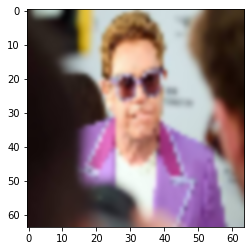

In [8]:
#img = image.load_img("elton_john.jpg",target_size = (224,224) )
plt.imshow(img, interpolation="bicubic")
plt.show()